In [2]:
import numpy as np
import math
import scipy
from scipy import spatial
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import transforms
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
import xarray as xr
import dask
from sklearn.neighbors import KDTree
import netCDF4

In [4]:
others = netCDF4.Dataset("/fast/gmooers/Raw_Data/extras/TimestepOutput_Neuralnet_SPCAM_216.cam.h1.2009-01-01-00000.nc")
levs = np.array(others.variables['lev'])
new = np.flip(levs)
crms = np.arange(1,129,1)
Xs, Zs = np.meshgrid(crms, new)

In [5]:
def latent_space_analysis(Images, title, iden):
    
    fz = 15*1.25
    lw = 4
    siz = 100
    XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
    XTEXT = 0.25 # Text placement
    YTEXT = 0.3 # Text placement
    
    plt.rc('text', usetex=False)
    matplotlib.rcParams['mathtext.fontset'] = 'stix'
    matplotlib.rcParams['font.family'] = 'STIXGeneral'
    #mpl.rcParams["font.serif"] = "STIX"
    plt.rc('font', family='serif', size=fz)
    matplotlib.rcParams['lines.linewidth'] = lw
    
    mean_image = np.mean(Images, axis=0)
    var_image = np.std(Images, axis=0)
    cmap="RdBu_r"
    fig, ax = plt.subplots(1,2, figsize=(16,2))
    
    
    cs0 = ax[0].imshow(var_image, cmap=cmap)
    ax[0].set_title("Image Standard Deviation")
    cs1 = ax[1].imshow(mean_image, cmap=cmap)
    ax[1].set_title("Image Mean")
    ax[0].set_ylim(ax[0].get_ylim()[::-1])
    ax[1].set_ylim(ax[1].get_ylim()[::-1])
    ax[1].set_xlabel("CRMs")
    ax[0].set_xlabel("CRMs")
    ax[0].set_ylabel("Pressure")
    ax[1].set_yticks([])
    y_ticks = np.arange(1300, 0, -300)
    ax[0].set_yticklabels(y_ticks)
    ax[1].set_yticklabels(y_ticks)
    divider = make_axes_locatable(ax[0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(cs0, cax=cax)
    divider = make_axes_locatable(ax[1])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(cs1, cax=cax)
    plt.suptitle(title)
    #plt.savefig("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/model_graphs/latent_space_components/"+iden+'_'+title+'.png')


In [6]:
def plot_generator_paper(sample, X, Z):
    
    fz = 15*1.25
    lw = 4
    siz = 100
    XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
    XTEXT = 0.25 # Text placement
    YTEXT = 0.3 # Text placement
    
    plt.rc('text', usetex=False)
    matplotlib.rcParams['mathtext.fontset'] = 'stix'
    matplotlib.rcParams['font.family'] = 'STIXGeneral'
    #mpl.rcParams["font.serif"] = "STIX"
    plt.rc('font', family='serif', size=fz)
    matplotlib.rcParams['lines.linewidth'] = lw
    
    
    cmap="RdBu_r"
    fig, ax = plt.subplots(1,1, figsize=(15,6))
    cs0 = ax.pcolor(X, Z, sample, cmap=cmap, vmin=0, vmax = 0.5)
    ax.set_title("Standard Deviation of Cluster")
    ax.set_ylim(ax.get_ylim()[::-1])
    ax.set_xlabel("CRMs", fontsize=fz*1.5)
    ax.xaxis.set_label_coords(0.54,-0.05)
    h = ax.set_ylabel("hPa", fontsize = fz*1.5)
    h.set_rotation(0)
    ax.yaxis.set_label_coords(-0.10,0.44)
    #y_ticks = np.arange(1350, 0, -350)
    #ax.set_yticklabels(y_ticks, fontsize=fz*1.33)
    ax.tick_params(axis='x', labelsize=fz*1.33)
    ax.tick_params(axis='y', labelsize=fz*1.33)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(cs0, cax=cax)
    cbar.set_label(label=r'$\left(\mathrm{m\ s^{-1}}\right)$', rotation="horizontal", fontsize=fz*1.5, labelpad=30, y = 0.65)
    plt.show()
    #plt.savefig("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/CI_Figure_Data/Anomaly.pdf")
    
#plot_generator(test[0,:,:])

In [7]:
fz = 15*1.5
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw

In [8]:
z_test_tsne_track_370 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Latant_Space_Constrained_VAEs/model_graphs/latant_space/2D_PCA_Latent_Space__370.npy")
z_test_tsne_track_369 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Latant_Space_Constrained_VAEs/model_graphs/latant_space/2D_PCA_Latent_Space__369.npy")
z_test_tsne_track_369_synoptic = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Latant_Space_Constrained_VAEs/model_graphs/latant_space/2D_PCA_Latent_Space__369.npy")


Test_Images = np.load("/fast/gmooers/Preprocessed_Data/W_Variable/Space_Time_W_Test.npy")

Max_Scalar = np.load("/fast/gmooers/Preprocessed_Data/W_Variable/Space_Time_Max_Scalar.npy")
Min_Scalar = np.load("/fast/gmooers/Preprocessed_Data/W_Variable/Space_Time_Min_Scalar.npy")

Test_Images = np.interp(Test_Images, (0, 1), (Min_Scalar, Max_Scalar))

Text(0.5, 1.0, 'W 500 Labeling for All')

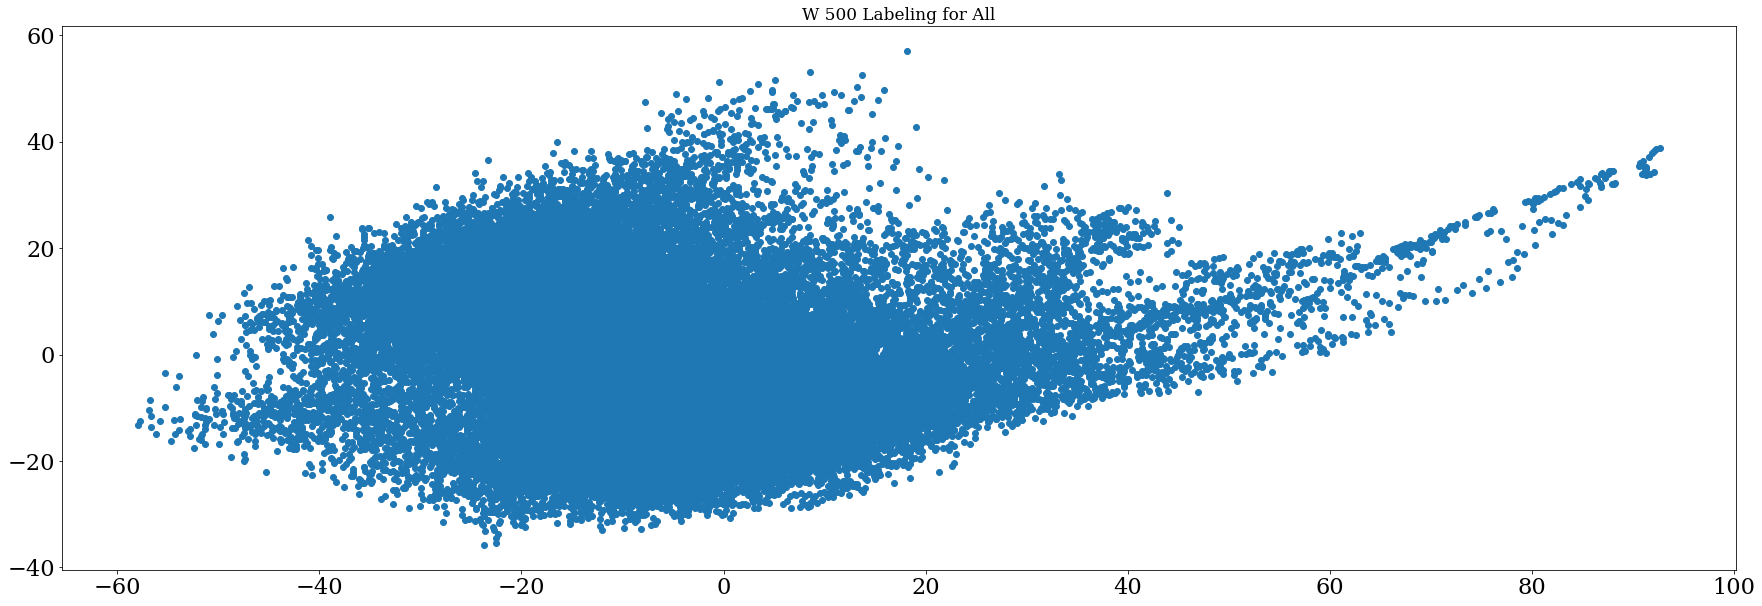

In [5]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track_370[:, 0], y=z_test_tsne_track_370[:, 1])
ax.set_title("W 500 Labeling for All", fontsize = fz*0.75)

In [6]:
# Generate fake data
x = np.random.normal(size=1000)
y = x * 3 + np.random.normal(size=1000)

# Calculate the point density
xy = np.vstack([x,y])
print(xy.shape)
print(z_test_tsne_track_370.shape)
z = scipy.stats.gaussian_kde(xy)(xy)
print(z.shape)

(2, 1000)
(50688, 2)
(1000,)


https://stackoverflow.com/questions/20105364/how-can-i-make-a-scatter-plot-colored-by-density-in-matplotlib

In [ ]:
#density_labels = scipy.stats.gaussian_kde(z_test_tsne_track_370)(z_test_tsne_track_370)
#print(density_labels.shape0)

In [ ]:
#fig, ax = plt.subplots()
#ax.scatter(x, y, c=z, s=100, edgecolor='')
#plt.show()

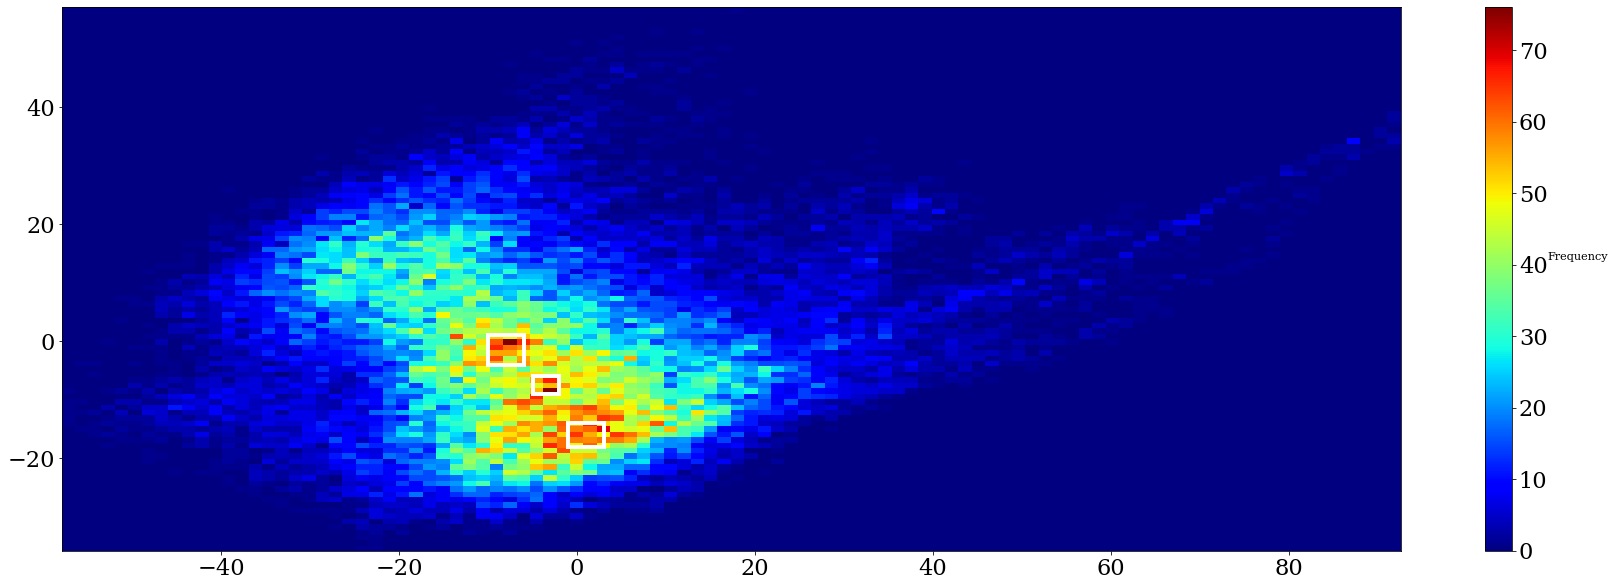

In [28]:
fig, ax = plt.subplots(figsize=(30,10))    
cb = ax.hist2d(z_test_tsne_track_370[:,0], z_test_tsne_track_370[:,1], bins=(100, 100), cmap=plt.cm.jet)
cbar = fig.colorbar(cb[3], ax=ax)
cbar.set_label(label="Frequency", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)
#rect = patches.Rectangle((vx,vy),xdist,ydist,linewidth=4,edgecolor='black',facecolor='none')
rect = patches.Rectangle((-10,-4),4,5,linewidth=4,edgecolor='white',facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((-5,-9),3,3,linewidth=4,edgecolor='white',facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((-1,-18),4,4,linewidth=4,edgecolor='white',facecolor='none')
ax.add_patch(rect)
print(" ")

In [40]:
selected_x  = np.squeeze(np.argwhere(np.logical_and(z_test_tsne_track_370[:,0] > -10, z_test_tsne_track_370[:,0] < -6)))
selected_y = np.squeeze(np.argwhere(np.logical_and(z_test_tsne_track_370[:,1] > -4, z_test_tsne_track_370[:,1] < 1)))
top_left = np.intersect1d(selected_x , selected_y)

selected_x  = np.squeeze(np.argwhere(np.logical_and(z_test_tsne_track_370[:,0] > -5, z_test_tsne_track_370[:,0] < -2)))
selected_y = np.squeeze(np.argwhere(np.logical_and(z_test_tsne_track_370[:,1] > -9, z_test_tsne_track_370[:,1] < -6)))
center_left = np.intersect1d(selected_x , selected_y)

selected_x  = np.squeeze(np.argwhere(np.logical_and(z_test_tsne_track_370[:,0] > -1, z_test_tsne_track_370[:,0] < 3)))
selected_y = np.squeeze(np.argwhere(np.logical_and(z_test_tsne_track_370[:,1] > -18, z_test_tsne_track_370[:,1] < -14)))
bottom_left = np.intersect1d(selected_x , selected_y)

In [41]:
Top_Images = Test_Images[top_left,:,:]
Middle_Images = Test_Images[center_left,:,:]
Bottom_Images = Test_Images[bottom_left,:,:]

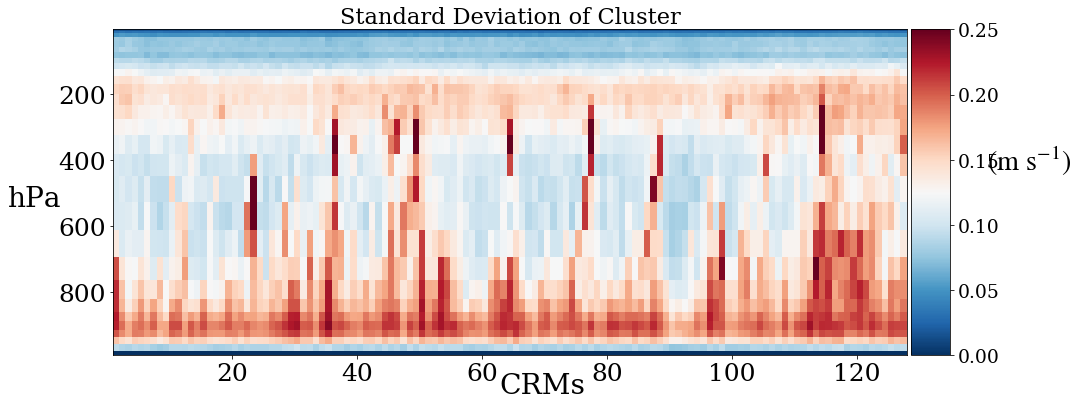

In [54]:
plot_generator_paper(np.std(Top_Images, axis=0), Xs, Zs)

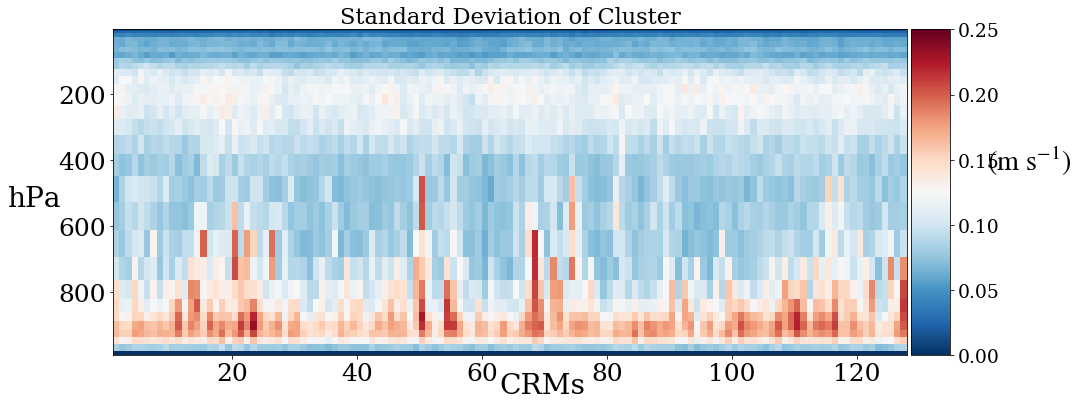

In [55]:
plot_generator_paper(np.std(Middle_Images, axis=0), Xs, Zs)

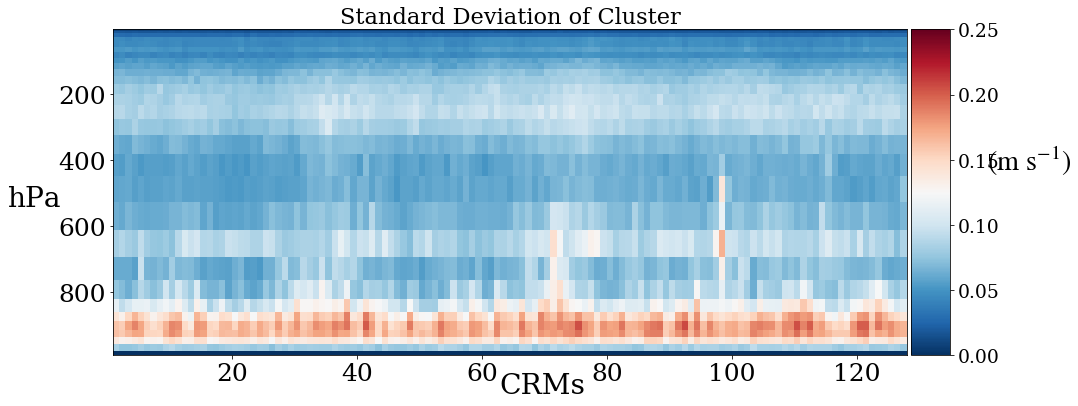

In [56]:
plot_generator_paper(np.std(Bottom_Images, axis=0), Xs, Zs)

Text(0.5, 1.0, 'W 500 Labeling for All')

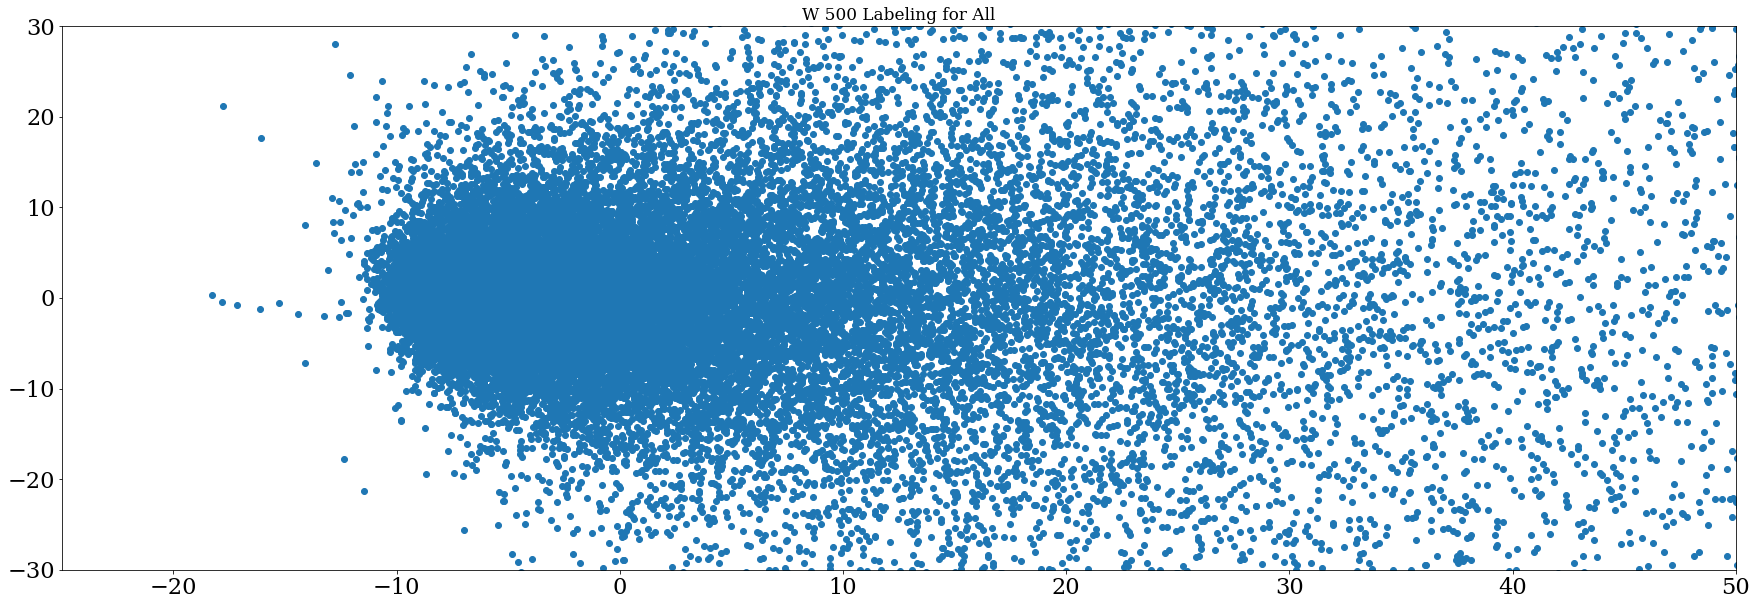

In [27]:
fig, ax = plt.subplots(figsize=(30,10))
ax.set_xlim(-25, 50)
ax.set_ylim(-30,30)
cp = ax.scatter(x=z_test_tsne_track_369[:, 0], y=z_test_tsne_track_369[:, 1])
ax.set_title("W 500 Labeling for All", fontsize = fz*0.75)

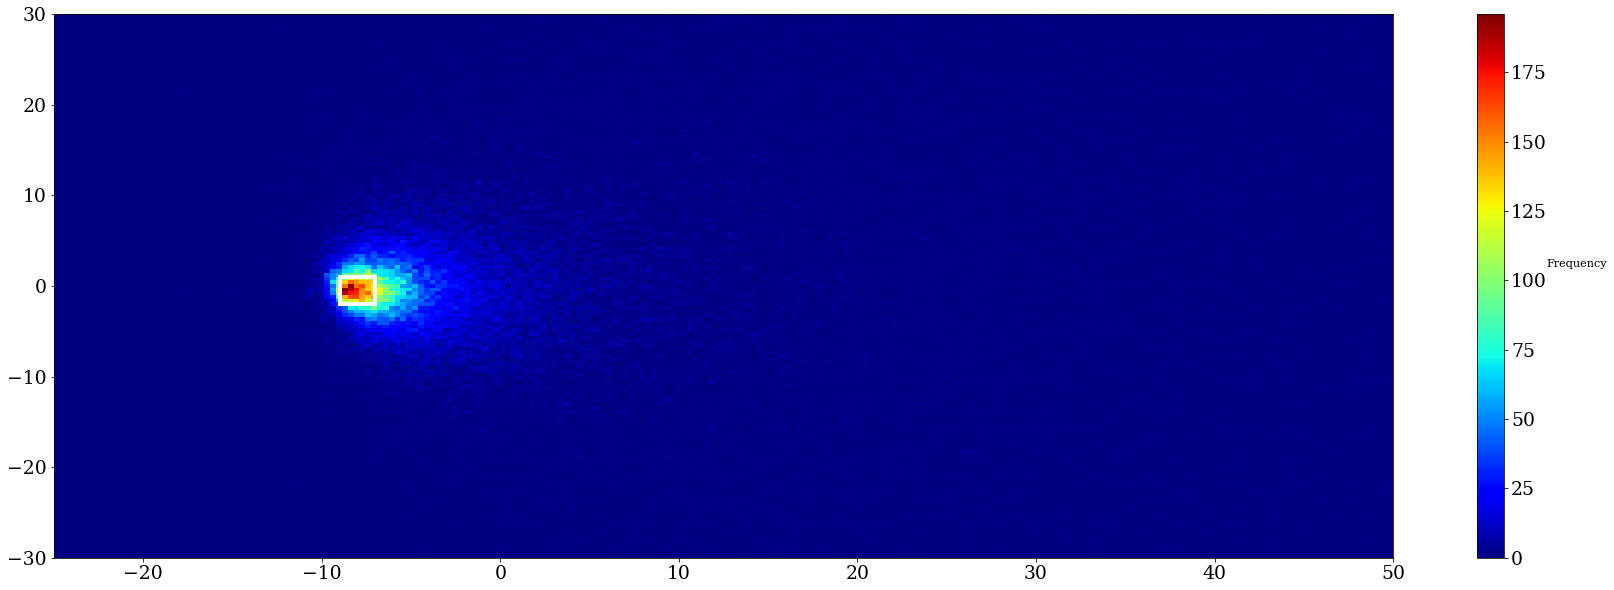

In [60]:
fig, ax = plt.subplots(figsize=(30,10))    
cb = ax.hist2d(z_test_tsne_track_369[:,0], z_test_tsne_track_369[:,1], bins=(1000, 1000), cmap=plt.cm.jet)
ax.set_xlim(-25, 50)
ax.set_ylim(-30,30)
cbar = fig.colorbar(cb[3], ax=ax)
cbar.set_label(label="Frequency", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)
rect = patches.Rectangle((-9,-2),2,3,linewidth=4,edgecolor='white',facecolor='none')
ax.add_patch(rect)
print(" ")

In [9]:
selected_x  = np.squeeze(np.argwhere(np.logical_and(z_test_tsne_track_369[:,0] > -8, z_test_tsne_track_369[:,0] < -3)))
selected_y = np.squeeze(np.argwhere(np.logical_and(z_test_tsne_track_369[:,1] > -8, z_test_tsne_track_369[:,1] < 5)))
top_left = np.intersect1d(selected_x , selected_y)

In [10]:
Top_Images = Test_Images[top_left,:,:]

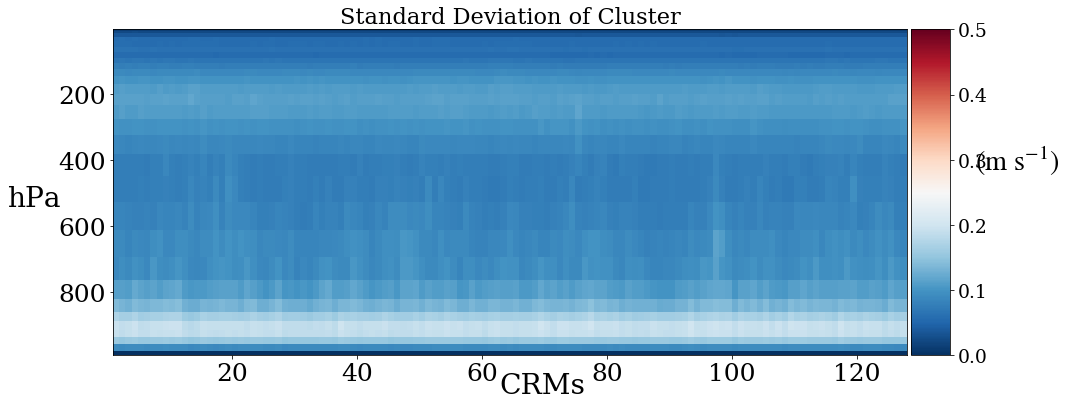

In [11]:
plot_generator_paper(np.std(Top_Images, axis=0), Xs, Zs)

In [44]:
amazon_z_test_tsne = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Synoptic_Latent_Spaces/Full_3_Months_Amazon_2D_PCA_Latent_Space__31.npy")
ocean_z_test_tsne = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Synoptic_Latent_Spaces/Full_3_Months_Atlantic_2D_PCA_Latent_Space__31.npy")


Text(0.5, 1.0, 'W 500 Labeling for All')

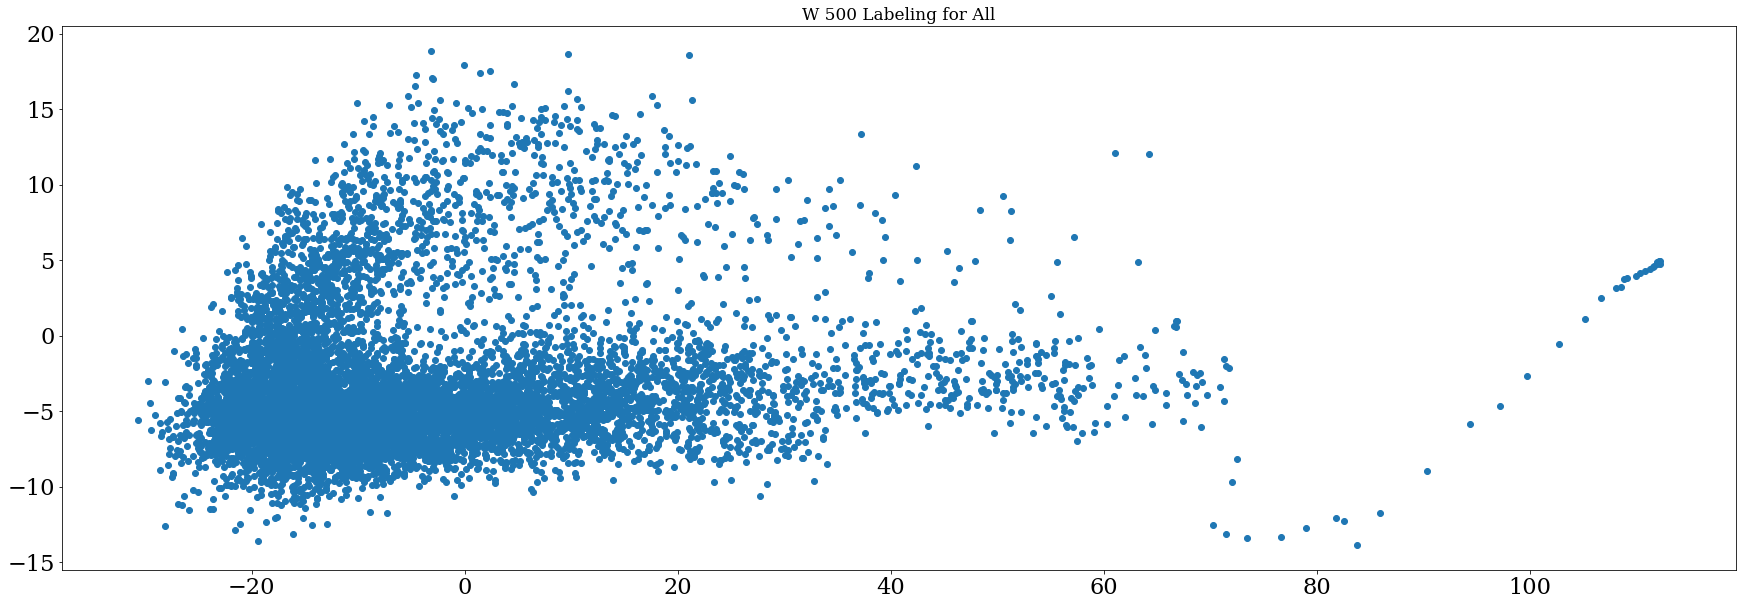

In [45]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=amazon_z_test_tsne[:, 0], y=amazon_z_test_tsne[:, 1])
ax.set_title("W 500 Labeling for All", fontsize = fz*0.75)

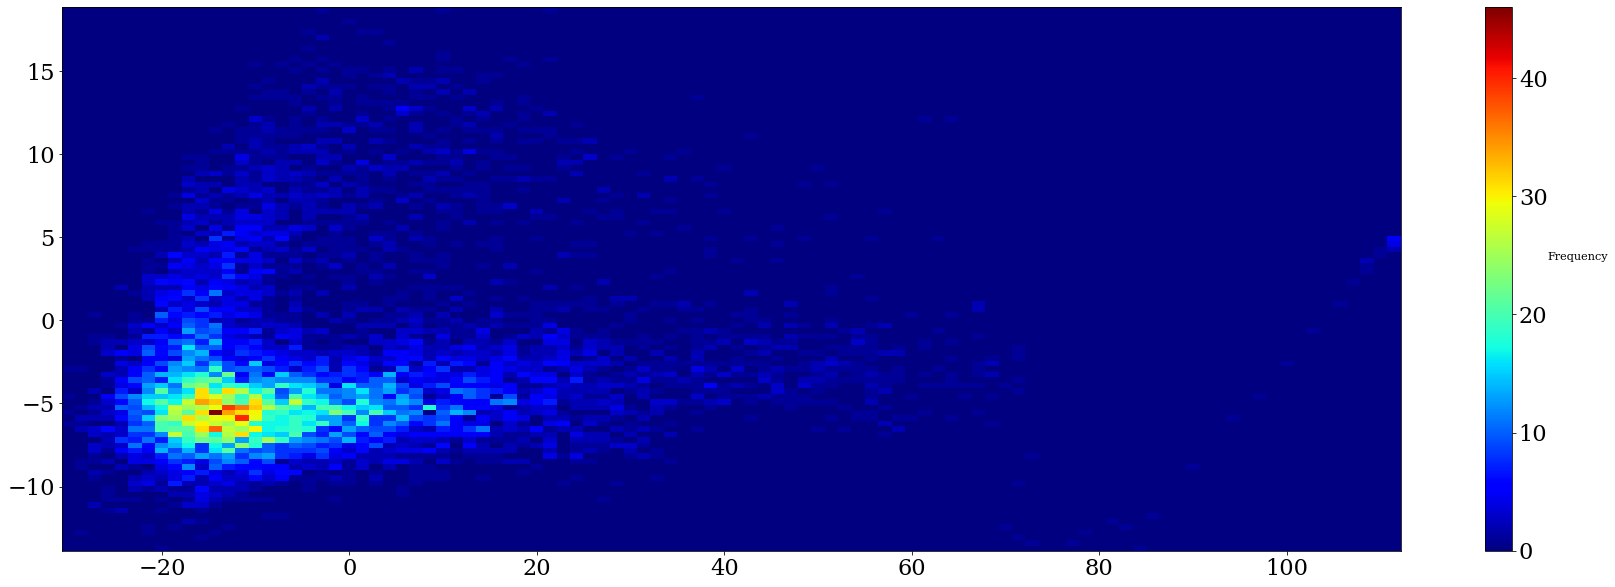

In [50]:
fig, ax = plt.subplots(figsize=(30,10))    
cb = ax.hist2d(amazon_z_test_tsne[:,0], amazon_z_test_tsne[:,1], bins=(100, 100), cmap=plt.cm.jet)
#ax.set_xlim(-25, 50)
#ax.set_ylim(-30,30)
cbar = fig.colorbar(cb[3], ax=ax)
cbar.set_label(label="Frequency", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)
print(" ")

Text(0.5, 1.0, 'W 500 Labeling for All')

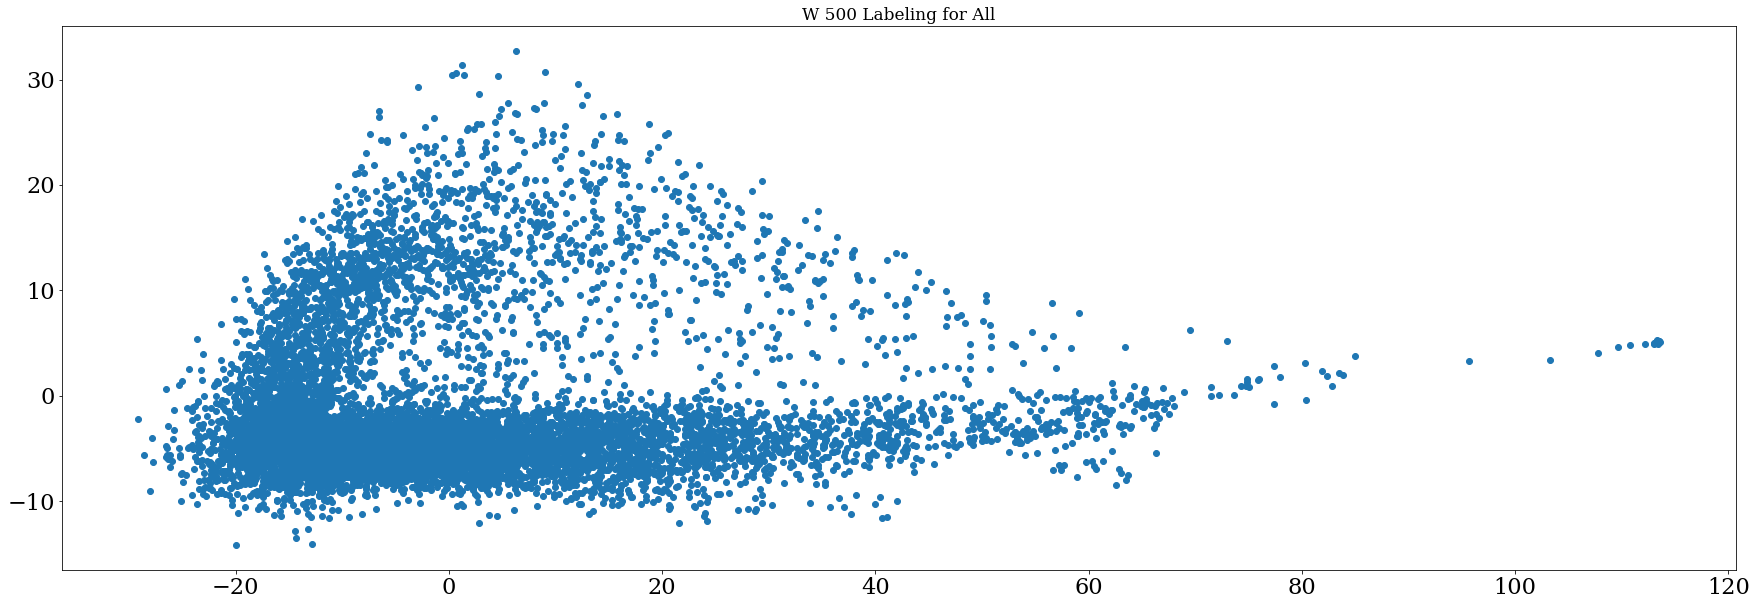

In [51]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=ocean_z_test_tsne[:, 0], y=ocean_z_test_tsne[:, 1])
ax.set_title("W 500 Labeling for All", fontsize = fz*0.75)

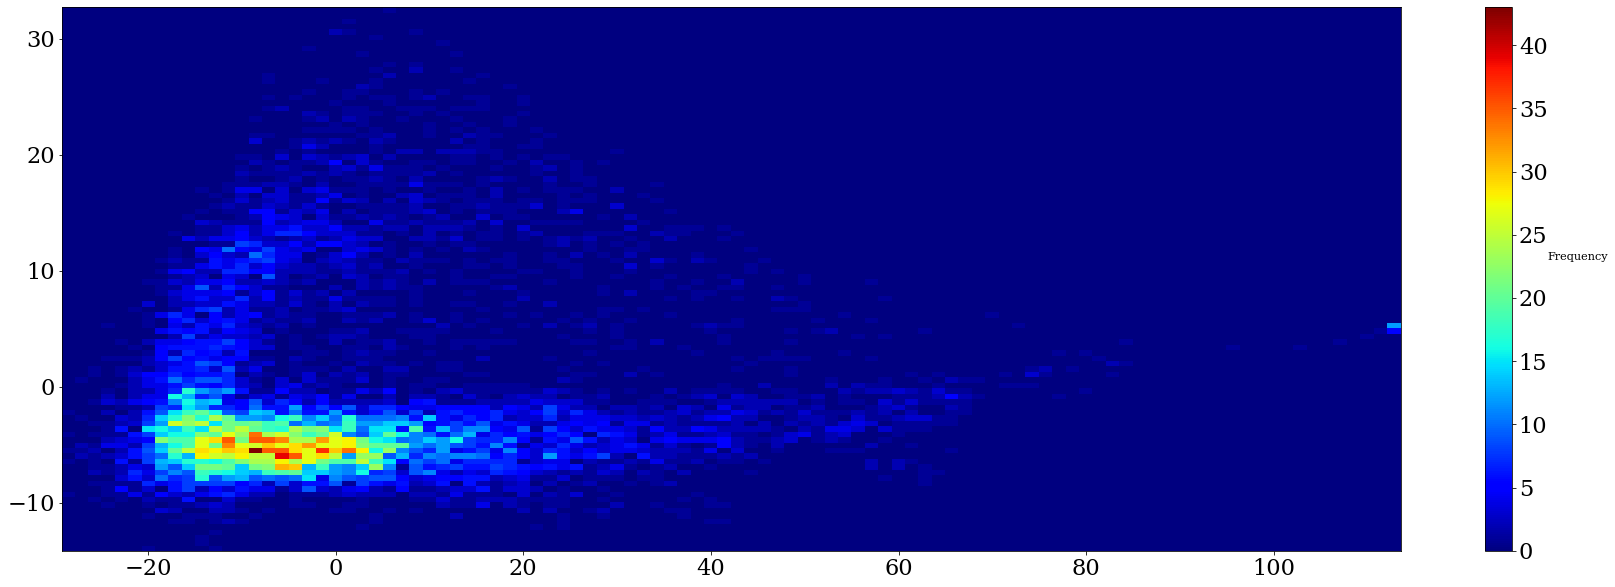

In [52]:
fig, ax = plt.subplots(figsize=(30,10))    
cb = ax.hist2d(ocean_z_test_tsne[:,0], ocean_z_test_tsne[:,1], bins=(100, 100), cmap=plt.cm.jet)
#ax.set_xlim(-25, 50)
#ax.set_ylim(-30,30)
cbar = fig.colorbar(cb[3], ax=ax)
cbar.set_label(label="Frequency", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)
print(" ")

In [65]:
z_test_tsne_83 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/PCA_Trials/Covariance_PCA_Mean_Var_Latent_Space__83.npy")

Text(0.5, 1.0, 'W 500 Labeling for All')

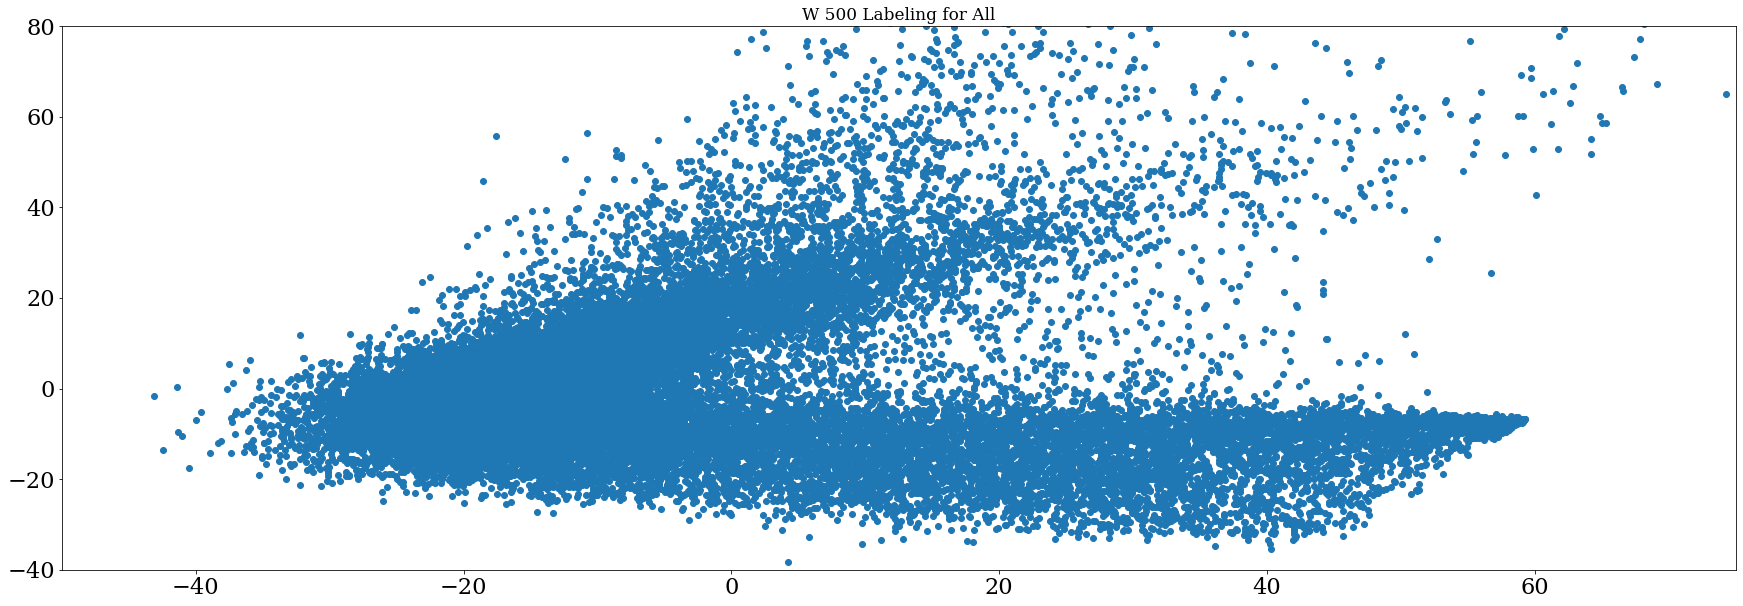

In [34]:
fig, ax = plt.subplots(figsize=(30,10))
ax.set_xlim(-50, 75)
ax.set_ylim(-40,80)
cp = ax.scatter(x=z_test_tsne_83[:, 0], y=z_test_tsne_83[:, 1])
ax.set_title("W 500 Labeling for All", fontsize = fz*0.75)

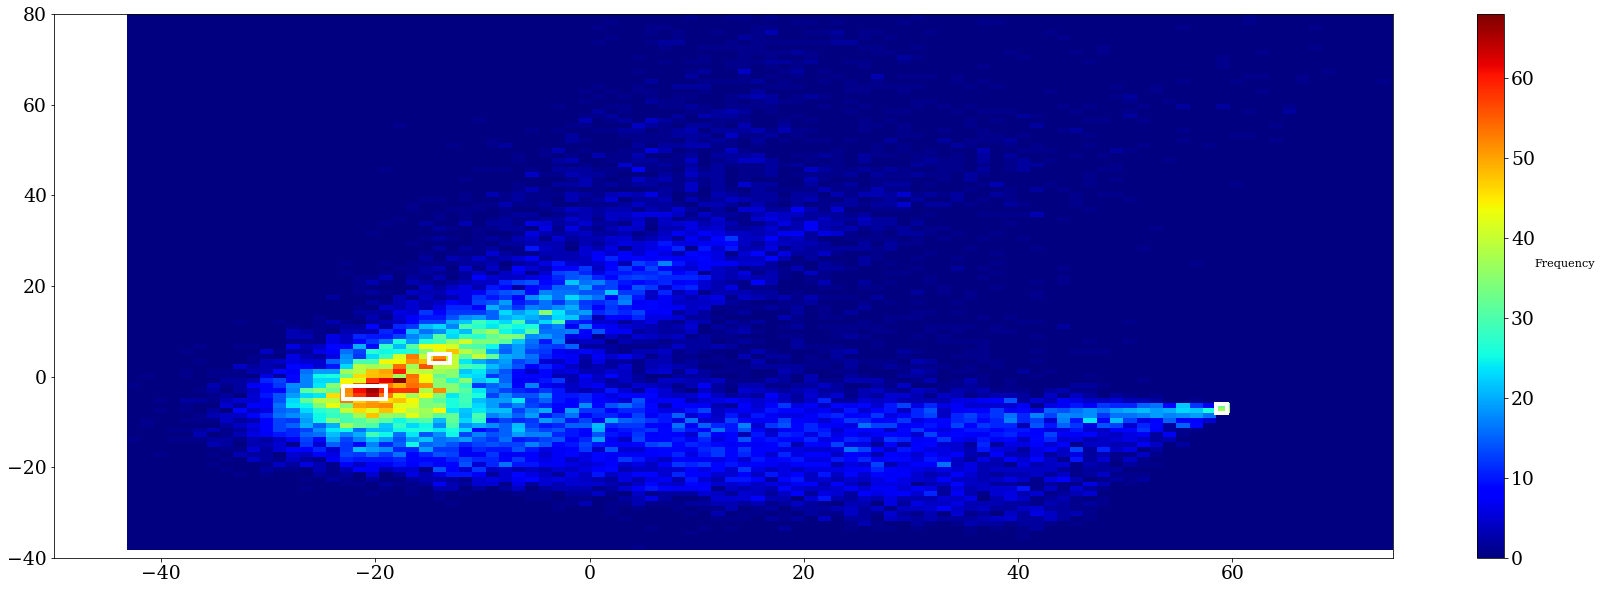

In [72]:
fig, ax = plt.subplots(figsize=(30,10))    
cb = ax.hist2d(z_test_tsne_83[:,0], z_test_tsne_83[:,1], bins=(150, 150), cmap=plt.cm.jet)
ax.set_xlim(-50, 75)
ax.set_ylim(-40,80)
cbar = fig.colorbar(cb[3], ax=ax)
cbar.set_label(label="Frequency", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)
rect = patches.Rectangle((-23,-5),4,3,linewidth=4,edgecolor='white',facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((-15,3),2,2,linewidth=4,edgecolor='white',facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((58.5,-8),1,2,linewidth=4,edgecolor='white',facecolor='none')
ax.add_patch(rect)
print(" ")

In [73]:
selected_x  = np.squeeze(np.argwhere(np.logical_and(z_test_tsne_83[:,0] > -23, z_test_tsne_83[:,0] < -19)))
selected_y = np.squeeze(np.argwhere(np.logical_and(z_test_tsne_83[:,1] > -5, z_test_tsne_83[:,1] < -2)))
top_left = np.intersect1d(selected_x , selected_y)

selected_x  = np.squeeze(np.argwhere(np.logical_and(z_test_tsne_83[:,0] > -15, z_test_tsne_83[:,0] < -13)))
selected_y = np.squeeze(np.argwhere(np.logical_and(z_test_tsne_83[:,1] > 3, z_test_tsne_83[:,1] < 5)))
center_left = np.intersect1d(selected_x , selected_y)

selected_x  = np.squeeze(np.argwhere(np.logical_and(z_test_tsne_83[:,0] > 58.5, z_test_tsne_83[:,0] < 59.5)))
selected_y = np.squeeze(np.argwhere(np.logical_and(z_test_tsne_83[:,1] > -8, z_test_tsne_83[:,1] < -6)))
bottom_left = np.intersect1d(selected_x , selected_y)

In [74]:
Top_Images = Test_Images[top_left,:,:]
Middle_Images = Test_Images[center_left,:,:]
Bottom_Images = Test_Images[bottom_left,:,:]

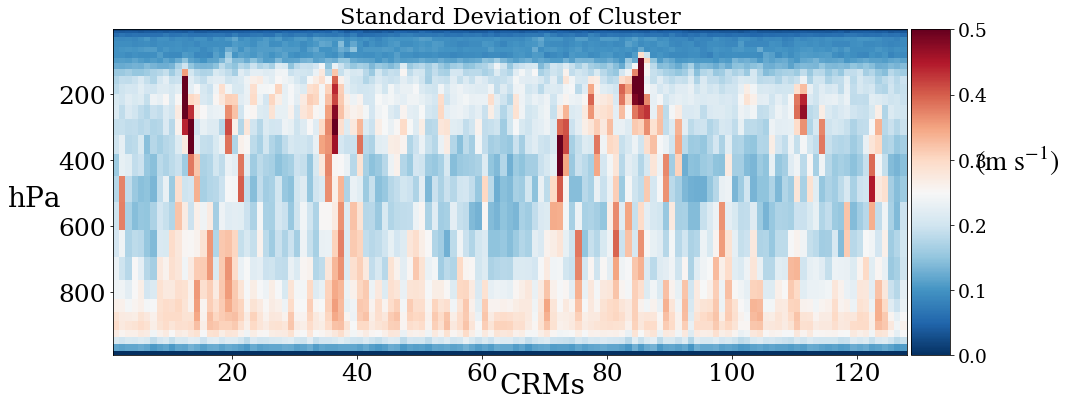

In [85]:
plot_generator_paper(np.std(Top_Images, axis=0), Xs, Zs)

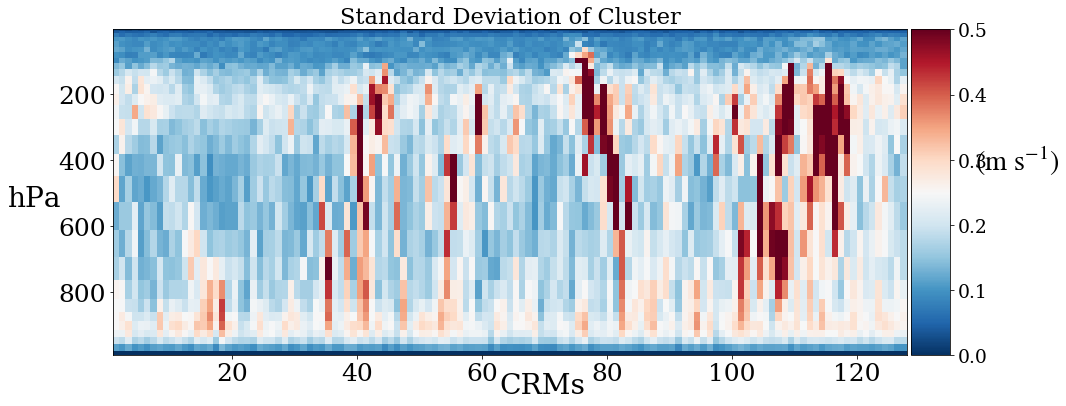

In [86]:
plot_generator_paper(np.std(Middle_Images, axis=0), Xs, Zs)

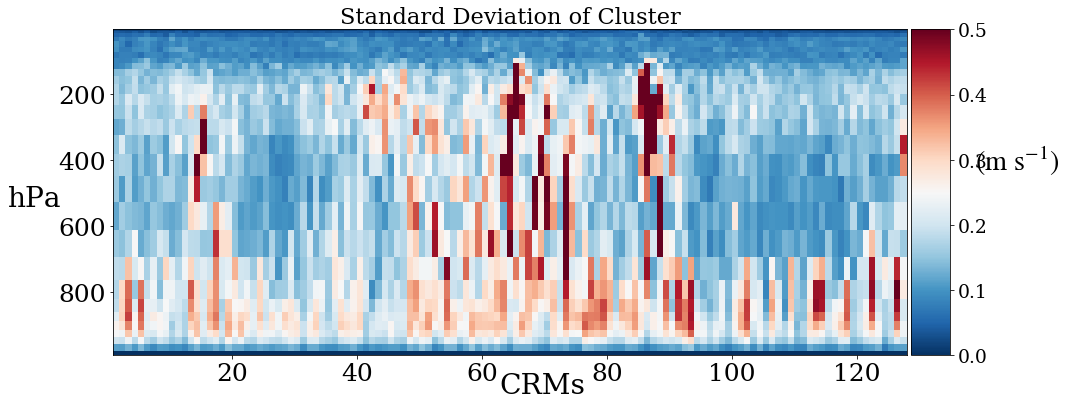

In [87]:
plot_generator_paper(np.std(Bottom_Images, axis=0), Xs, Zs)